 ╔══<i><b>&nbsp;Alai-DeepLearning&nbsp;</b></i>══════════════════════════════════╗
###  &nbsp;&nbsp; **✎&nbsp;&nbsp;Week 3. Pandas & Matplotlib**
# Homework 1. 타이타닉 데이터셋 분석하기

### _Objective_
1. *앞서 배운 Pandas와 Matplotlib을 실제 데이터셋을 처음부터 끝까지 탐색해보는 과정을 가집니다.* 


╚═══════════════════════════════════════════════╝

In [0]:
%matplotlib inline  
import matplotlib.pyplot as plt  

import pandas as pd
import numpy as np

# \[ 타이타닉 데이터셋 탐색하기\]
---

---

> * 출처 : [캐글 타이타닉 데이터셋](https://www.kaggle.com/hesh97/titanicdataset-traincsv#train.csv) <br>
> * _내용 : 타이타닉 호에 탔던 탑승객들의 생존 유무에 대한 내용_ <br>
> * _지표 : 이름, 성별, 나이, 티켓 종류 등 12컬럼 존재_ <br>

|변수명 | 변수명 설명|
|----|----|
| survival | 생존 유무(0=사망, 1=생존) |
| pclass | 탑승객 클래스(1=1st, 2=2nd, 3=3rd) |
| name | 탑승객 이름 |
| sex  | 성별 |
| age | 나이 |
| sibsp | 동승한 형제/배우자 수 |
| parch | 동승한 부모/자녀 수 |
| ticket | 티켓 번호 |
| fare   | 운임비 |
| cabin | 선실 |
| embarked | 승선한 항구 이름 (C=Cherbourg; Q=Queenstown; S=southampton) |


## (1)  Pandas를 통해 데이터 읽어오기

In [0]:
!wget https://s3.ap-northeast-2.amazonaws.com/pai-datasets/alai-deeplearning/titanic_dataset.csv
df = pd.read_csv("./titanic_dataset.csv")

--2019-03-25 13:50:09--  https://s3.ap-northeast-2.amazonaws.com/pai-datasets/alai-deeplearning/titanic_dataset.csv
Resolving s3.ap-northeast-2.amazonaws.com (s3.ap-northeast-2.amazonaws.com)... 52.219.60.41
Connecting to s3.ap-northeast-2.amazonaws.com (s3.ap-northeast-2.amazonaws.com)|52.219.60.41|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/csv]
Saving to: ‘titanic_dataset.csv.1’

titanic_dataset.csv 100%[===================>]  59.76K  --.-KB/s    in 0.006s  

2019-03-25 13:50:09 (9.86 MB/s) - ‘titanic_dataset.csv.1’ saved [61194/61194]



## (2) 각 열 별로 얼마나 결측(missing value)되어 있는지 확인하기

현재 타이타닉 생존 데이터셋에는 일부 값들이 결측되어 있다. 각 Feature(열) 별로 몇 개가 결측되어 있는지를 확인해보자.

In [0]:
# 전체 행 수 - 각 열별 null이 아닌 값의 갯수
df.shape[0] - df.count()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [0]:
# 이와 같은 방식으로도 가져올 수 있다.
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## (2) 생존자 수 확인

데이터 내에 몇 명이 생존했고, 몇 명이 사망했는지를 확인해보자.

In [0]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

## (3) 연령 추론

타이타닉 내 승객 이름에는 Title이 들어갑니다. 나이 정보가 없을 경우, 이 Title에 따라 대략적인 나이를 추론할 수 있습니다. 이번에는 각 `Name` 컬럼에서 Title을 추출 후, Title 별로 평균 나이가 어떻게 되는지 확인해 주세요.

| default Title | 의미 |
| ---- | ---- |
| Mr   | Adult man (regardless of marital status) |
| Mrs  | Adult woman (usually just for married women, widows, and divorcees) |
| Ms | Adult woman (regardless of marital status) |
| Miss | Formal title for unmarried women and for female children |
| Master | For male children: Young boys were formerly addressed as "Master [first name]." This was the standard form for servants to use in addressing their employer's minor sons. It is also the courtesy title for the eldest son of a Scottish laird. |
| Maid | Archaic: When used as a title before a name (and not as a general term for a young domestic worker housemaid girl), this was a way to denote an unmarried woman, such as the character Maid Marian. |
| Madam | Adult Woman |
| Don | master of a household |
| Rev | Reverend |
| Dr | Docter |
| Capt | Captain |

In [0]:
def extract_title(name):
    name = name.lower() #  소문자화
    
    title_list = ["madam", "maid", "master", 
                  "miss","ms","mrs","mr",
                  "don",'rev','dr','capt']
    for title in title_list:
        if title in name:
            return title
    return "None"

In [0]:
df['title'] = df.loc[~df.Name.isna()].Name.apply(extract_title)

In [0]:
df.loc[~df.Name.isna(),["Age",'title']].groupby('title').mean()

,Age
title,
None,41.500000
capt,70.000000
don,40.000000
dr,42.000000
maid,41.000000
master,4.574167
miss,21.773973
mr,32.435115
mrs,35.694444


## (4) 나이 분포도 확인

탑승객들의 나이가 어떤식으로 분포되어 있는지 확인해보자. 

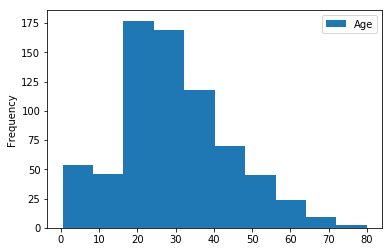

In [0]:
df.plot(y='Age',kind='hist')

## (5) 성별에 따른 생존율 비교

타이타닉 영화에서처럼, 실제로 승객들이 여성을 우선 생존시키려고 하는지 확인해 보자.

In [0]:
df.Survived = df.Survived.apply(lambda x : "dead" if x==0 else "Alive")

In [0]:
df.pivot_table(values=['PassengerId'], 
               index='Sex', 
               columns='Survived',
               aggfunc='count')

PassengerId     
Survived       Alive dead
Sex                      
female           233   81
male             109  468

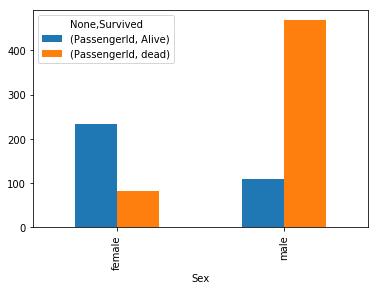

In [0]:
df.pivot_table(values=['PassengerId'], 
               index='Sex', 
               columns='Survived',
               aggfunc='count').plot(kind='bar')

## (6) 연령에 따른 생존율 비교

10대, 20대, 30대 등 연령 대별로 생존율이 어떻게 달라지는 지 확인해보자. 

In [0]:
df['AgeGroup'] = df.loc[~df.Age.isna(),'Age'].apply(lambda x: x//10)

In [0]:
df.pivot_table(values=['PassengerId'], 
               index='AgeGroup', 
               columns='Survived',
               aggfunc='count',
               fill_value=0)

PassengerId     
Survived       Alive dead
AgeGroup                 
0.0               38   24
1.0               41   61
2.0               77  143
3.0               73   94
4.0               34   55
5.0               20   28
6.0                6   13
7.0                0    6
8.0                1    0

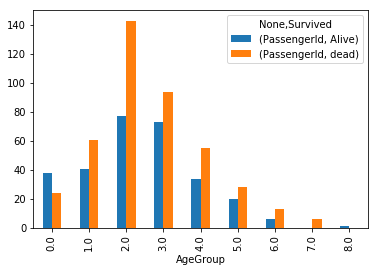

In [0]:
df.pivot_table(values=['PassengerId'], 
               index='AgeGroup', 
               columns='Survived',
               aggfunc='count',
               fill_value=0).plot(kind='bar')

## (7) 각 Feature 간 상관계수 구하고, 생존에 가장 직결된 요소 파악하기

피어슨 상관계수는 두 변수 간에 어떤 관계를 갖고 있는지를 분석하는 방법입니다. 강한 선형관계를 가질수록 1 혹은 -1로 치중되고, 아니면 0에 수렴됩니다. 높은 상관계수를 가지는 요소를 파악해봅시다.

In [0]:
import seaborn as sns

In [0]:
df = pd.read_csv("./titanic_dataset.csv")

# 성별을 숫자로 변경
df.Sex = df.Sex.apply(lambda x : 1 if x=='male' else 0)

corr_df = df.corr()

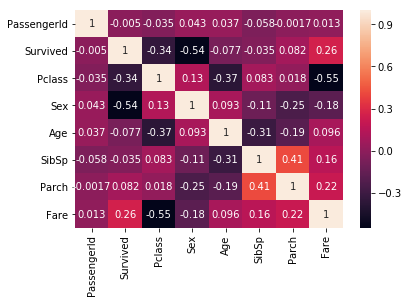

In [0]:
sns.heatmap(corr_df, annot=True, cbar=True)
plt.show()